In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

def parse_rank_info(rank):
    # Parse rank information
    try:
        return re.search(r'\d+', rank).group(0)
    except AttributeError:
        return np.nan

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
race_df = pd.read_csv('data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv('data/horse.csv', low_memory=False, index_col=0)
horse_race_df = pd.read_csv('data/horse_race.csv', low_memory=False, index_col=0)

# Further preprocessing
horse_race_df['finishing_position'] = horse_race_df['finishing_position'].apply(lambda x: parse_rank_info(x))
horse_race_df = horse_race_df.dropna(subset=['finishing_position'])
horse_race_df['finishing_position'] = horse_race_df['finishing_position'].astype(int)

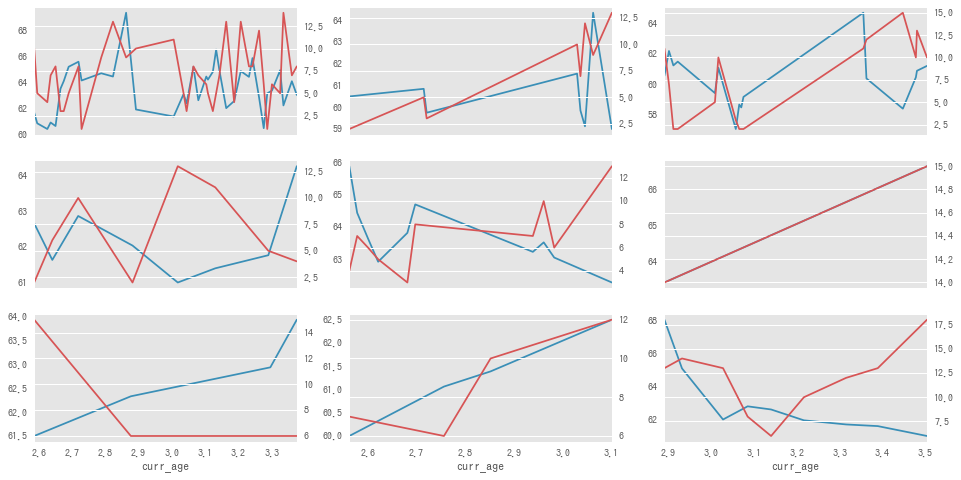

In [2]:
# Randomly choose horses to plot
id_count = horse_race_df['horse_id'].value_counts()
id_count = id_count[id_count > 1]
plot_num = 3
fig, ax = plt.subplots(plot_num, plot_num)
for i_idx in range(plot_num):
    for j_idx in range(plot_num):
        random_index = id_count.sample(n=1).index
        random_horse_record = horse_race_df.loc[horse_race_df['horse_id'].isin(random_index)]
        '''
            Blue: Run time
            Red: Finishing position (rank)
        '''
        random_horse_record.sort_values('curr_age').plot(x='curr_age', y='run_time_1000', 
                                                         color='#3A8FB7', ax=ax[i_idx][j_idx], legend=None)
        random_horse_record.sort_values('curr_age').plot(x='curr_age', y='finishing_position', 
                                                         color='#D75455', ax=ax[i_idx][j_idx], 
                                                         legend=None, secondary_y=True)